In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset Loading

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Algorithms/7-Random Forest/car_evaluation.csv", header=None)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1728 non-null   object
 1   1       1728 non-null   object
 2   2       1728 non-null   object
 3   3       1728 non-null   object
 4   4       1728 non-null   object
 5   5       1728 non-null   object
 6   6       1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


##Exploratory data analysis

In [ ]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
##Renaming the columns
col_names = ['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety', 'class']

df.columns = col_names

col_names

['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety', 'class']

In [ ]:
df.head()

,price,maintainence,doors,persons,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         1728 non-null   object
 1   maintainence  1728 non-null   object
 2   doors         1728 non-null   object
 3   persons       1728 non-null   object
 4   boot_space    1728 non-null   object
 5   safety        1728 non-null   object
 6   class         1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


##Data Preparation

In [ ]:
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
##train test plot
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

##Feature Engineering

In [ ]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['price', 'maintainence', 'doors', 'persons', 'boot_space', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(random_state=0)

In [ ]:
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9740


##Random Forest Classifier model with parameter n_estimators

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_n = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_n.fit(X_train, y_train)

# Predict on the test set results
y_pred_n = rfc_n.predict(X_test)

# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_n)))

Model accuracy score with 100 decision-trees : 0.9740


##Find important features with Random Forest model

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety          0.286702
persons         0.247207
price           0.198624
maintainence    0.125952
boot_space      0.074763
doors           0.066752
dtype: float64

##Visualize feature scores of the feature

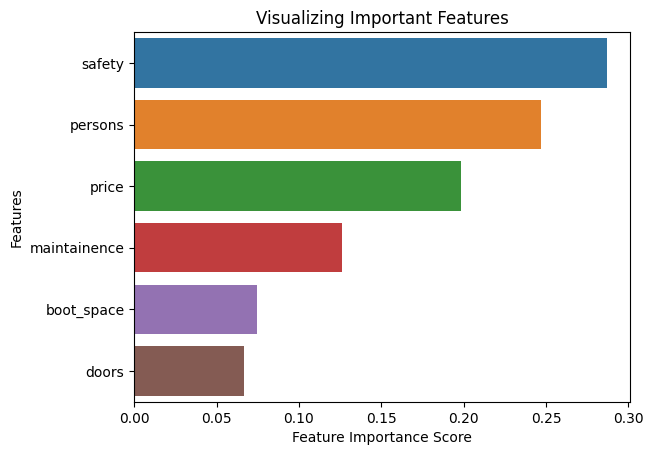

In [ ]:
import seaborn as sns

sns.barplot(x=feature_scores, y=feature_scores.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

plt.title("Visualizing Important Features")

plt.show()

##Build Random Forest model on selected features

In [ ]:
X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
encoder = ce.OrdinalEncoder(cols=['price', 'maintainence', 'persons', 'boot_space', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
clf = RandomForestClassifier(random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9306
